## **Time Series Forecasting for Loan Demand using Python**

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 2. Simulate Loan Demand Data (You can replace this with actual CSV file)
dates = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
np.random.seed(42)
demand = np.random.poisson(lam=50000, size=len(dates)) + np.linspace(0, 10000, len(dates))
df = pd.DataFrame({'Date': dates, 'Loan_Demand': demand})
df.to_csv('loan_demand_data.csv')
df.set_index('Date', inplace=True)


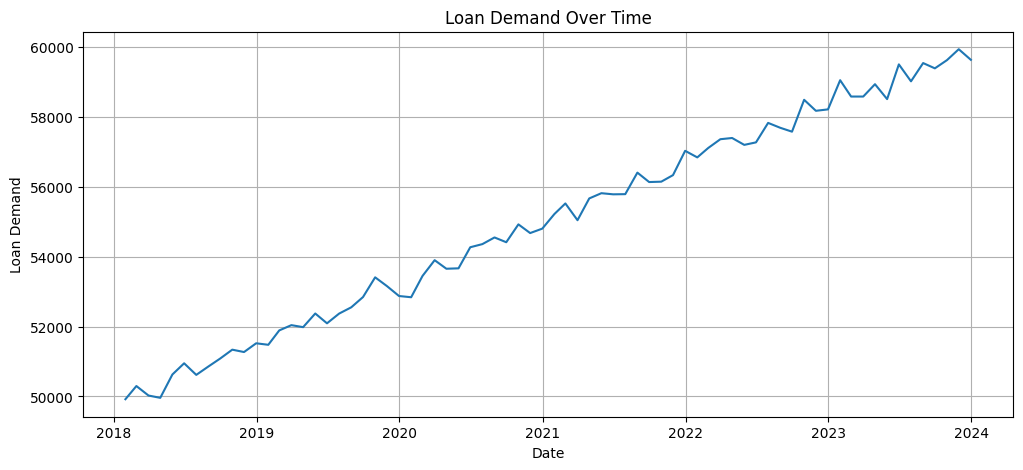

In [ ]:
# 3. Visualize the Time Series
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Loan_Demand'])
plt.title("Loan Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Loan Demand")
plt.grid(True)
plt.show()

In [ ]:
# 4. Check for Stationarity (ADF Test)
result = adfuller(df['Loan_Demand'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.3681234980446764
p-value: 0.5974591577179049


In [ ]:
# 5. Differencing if Not Stationary
if result[1] > 0.05:
    df['Loan_Demand_Diff'] = df['Loan_Demand'].diff().dropna()
    df.dropna(inplace=True)
else:
    df['Loan_Demand_Diff'] = df['Loan_Demand']

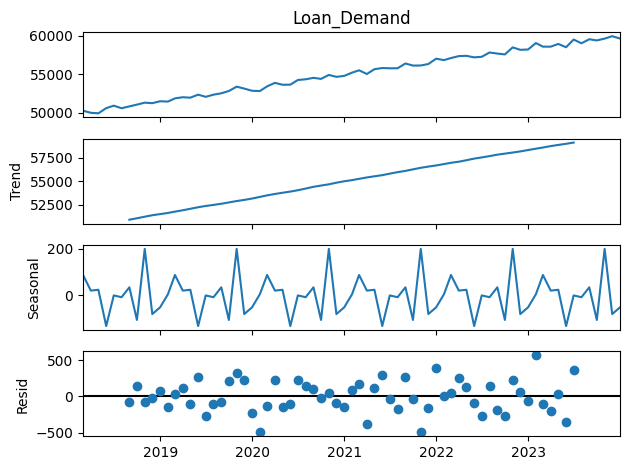

In [ ]:
# 6. Seasonal Decomposition
result = seasonal_decompose(df['Loan_Demand'], model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()

In [ ]:
# 7. Train-Test Split
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
# 8. SARIMA Modeling
model = SARIMAX(train['Loan_Demand'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

In [ ]:
# 9. Forecasting
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

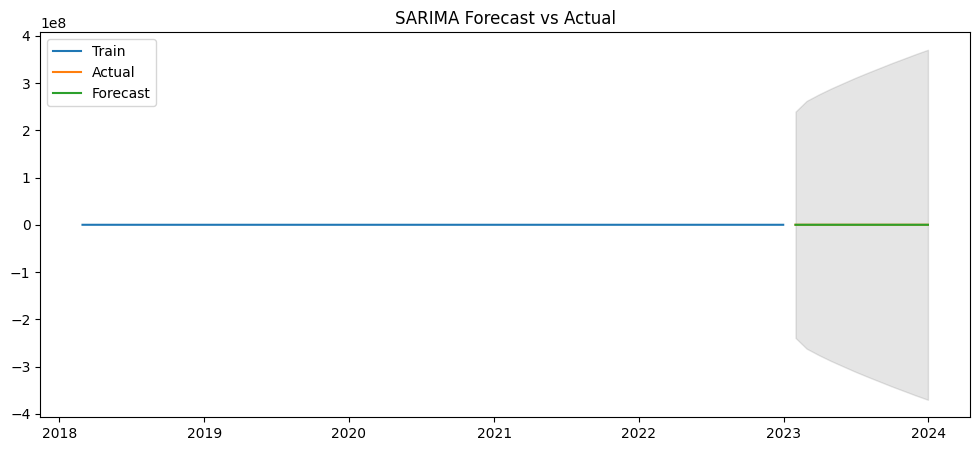

In [ ]:
# 10. Plot Forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Loan_Demand'], label='Train')
plt.plot(test.index, test['Loan_Demand'], label='Actual')
plt.plot(test.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()

In [ ]:
# 11. Evaluation
mae = mean_absolute_error(test['Loan_Demand'], forecast.predicted_mean)
rmse = np.sqrt(mean_squared_error(test['Loan_Demand'], forecast.predicted_mean))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 294.51
RMSE: 367.92


In [ ]:
# 12. Future Forecasting
future_forecast = results.get_forecast(steps=12)
future_df = pd.DataFrame({
    'Forecast': future_forecast.predicted_mean
}, index=pd.date_range(start='2024-01-01', periods=12, freq='M'))

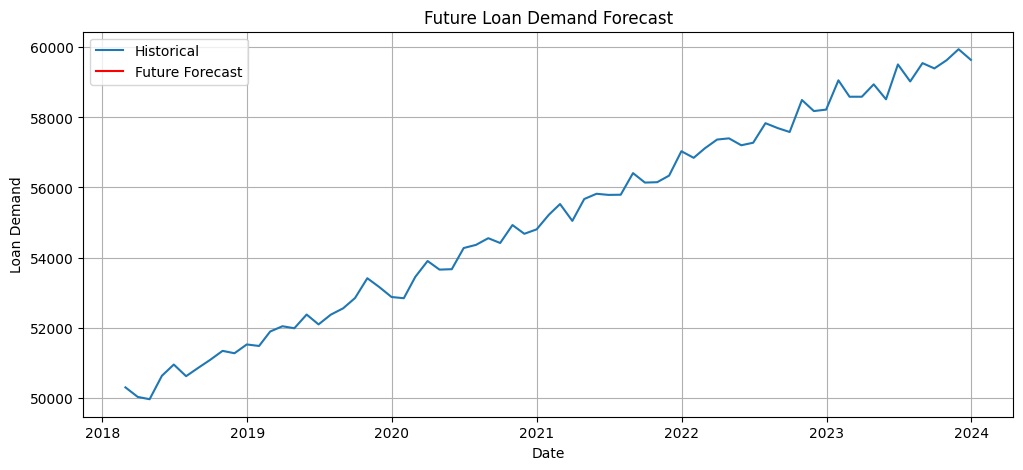

In [ ]:
# 13. Plot Future Forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Loan_Demand'], label='Historical')
plt.plot(future_df['Forecast'], label='Future Forecast', color='red')
plt.title("Future Loan Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Loan Demand")
plt.legend()
plt.grid(True)
plt.show()